In [1]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.float_format', lambda x: '%.3f' % x)


# 데이터 준비

In [2]:
df = pd.read_csv("my_data/naver_finance/2016_12.csv")

In [3]:
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000
2,BNK금융지주,49126.760,14.499,10.546,5181.144,7.919,0.564,NaN,1568.237,20810.660,15358.993,5.535,0.417,0.565,8680.000,9420.000
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000


## 수익률 구하기 (16.12 ~ 17.12)

In [5]:
df['rtn'] = df['price2'] / df['price'] - 1

# PER 값에 따라 group number 부여하기

## 값을 기준으로 grouping 하기 (DIFFERENT number of members in each  group)

### boolean selection & loc 사용

- 곧 뒤에서 배울 `cut()` 을 사용하면 아래 방법보다 더 쉽게 가능합니다. 하지만 여기서 진행하는 방식들도 매우 중요하니 반드시 익혀두세요!

In [6]:
(df['PER(배)'] >= 10).head()

0     True
1     True
2    False
3     True
4     True
Name: PER(배), dtype: bool

In [7]:
bound1 = df['PER(배)'] >= 10
bound2 = (5 <= df['PER(배)']) & (df['PER(배)'] < 10)
bound3 = (0 <= df['PER(배)']) & (df['PER(배)'] < 5)
bound4 = df['PER(배)'] < 0

In [8]:
df.shape

(681, 17)

In [9]:
df[bound1].shape 
# = df.loc[bound1].shape

# get operation

(378, 17)

In [13]:
# set operation도 loc으로 가능하다.
# 파이썬의 for loop을 쓰는 것은 판다스의 벡터연산의 장점을 버리는 것.
# 만약 판다스을 쓰면서 for loop을 쓰고 있다면, 뭔가 잘못되지 않았는가 생각해보라.
df.loc[bound1, 'PER_Score'] = 1
df.loc[bound2, 'PER_Score'] = 2
df.loc[bound3, 'PER_Score'] = 3
df.loc[bound4, 'PER_Score'] = -1

In [14]:
df['PER_Score'].head()

0   1.000
1   1.000
2   2.000
3   1.000
4   1.000
Name: PER_Score, dtype: float64

In [15]:
df['PER_Score'].nunique()

4

In [16]:
df['PER_Score'].value_counts()

1.000     378
2.000     148
-1.000    120
3.000      23
Name: PER_Score, dtype: int64

- `PER_Score`가 float number로 나오는 이유?

In [21]:
# 이래서 먼저 EDA를 확실히 해야 한다.
# 보통 nan이 있는 행을 없애거나,
# 다른 PER 값들의 평균으로 채워버리거나,
# -999같은 특별한 값으로 채우거나 한다.
df['PER_Score'].hasnans

True

In [22]:
df['PER_Score'].isna().sum()

12

In [23]:
df['PER(배)'].isna().sum()

12

In [24]:
df[df['PER(배)'].isna()]

# 크롤링하면서 누락되었을 수도 있고
# 실제로 데이터가 없을 수도 있다.
# 데이터를 다른데서 가져오는 방법이 있다. 다른 금융 사이트라거나...
# 여기서는 일단 score를 그냥 0으로만 넣어보자.

# 팁: 특정 값으로 채우면, 원래 그 값이었던 데이터와 구분하기 어렵다.
# 데이터 값의 특성을 잘 반영해서 메꿀 값을 선택하는 것이 중요.

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_Score
27,HSD엔진,8029.166,0.528,-22.571,-1812.265,-32.685,-13.120,2.749,-2607.575,7687.264,11552.757,NaN,0.404,NaN,2290.000,2569.000,0.122,NaN
103,고려개발,6238.648,4.223,-4.895,-305.362,141.454,-4.903,20.462,-3118.716,1988.392,63716.438,NaN,6.327,NaN,12430.000,11659.000,-0.062,NaN
126,까뮤이앤씨,1397.081,3.180,2.331,32.563,6.721,2.390,7.808,72.117,1153.474,3094.153,NaN,0.958,NaN,1105.000,1010.000,-0.086,NaN
133,남영비비안,2074.953,-0.949,-1.103,-22.895,-1.667,-1.371,-2.101,-32.324,2031.729,3021.213,NaN,0.436,NaN,885.000,777.000,-0.122,NaN
203,티탑스,940.880,-7.061,-4.217,-39.673,-8.980,-4.092,NaN,-1917.146,19287.736,44614.258,NaN,0.058,NaN,1115.000,1575.000,0.413,NaN
231,롯데칠성음료,22642.120,6.463,3.054,691.439,2.961,1.531,3.109,5107.448,172911.200,166829.270,NaN,8.363,NaN,145675.000,132900.000,-0.088,NaN
371,쌍용양회공업,14302.892,18.027,12.243,1751.111,11.589,5.694,9.037,400.919,3627.562,3319.079,NaN,0.816,NaN,2960.000,3730.000,0.260,NaN
507,컨버즈,459.748,-19.328,-35.526,-163.331,NaN,NaN,NaN,-33811.426,20164.525,95172.870,NaN,0.397,NaN,4416.000,1750.000,-0.604,NaN
560,풀무원,20306.730,1.869,0.491,99.778,6.765,0.979,1.933,4881.663,6986.189,533111.700,NaN,2.011,NaN,14050.000,17200.000,0.224,NaN
622,한일철강,1112.614,5.475,4.236,47.131,3.405,1.467,4.510,249.431,8408.528,5453.988,NaN,0.297,NaN,2500.000,2645.000,0.058,NaN


In [25]:
df.loc[df['PER_Score'].isna(), "PER_Score"] = 0

# 아래와 같은 방식으로도 가능
# df['PER_Score'] = df['PER_Score'].fillna(0) 
# df.loc[:, 'PER_Score'] = df['PER_Score'].fillna(0)

### boolean series 의 연산 특성 사용

In [26]:
df.loc[:, "PER_Score1"] = (bound1 * 1)  + (bound2 * 2) + (bound3 * 3) + (bound4 * -1) 
# 위와 달리 int가 되는 이유?
# 여기서 True를 받지 못한 항목은 0을 받기 때문.

In [27]:
df['PER_Score1'].head()

0    1
1    1
2    2
3    1
4    1
Name: PER_Score1, dtype: int32

In [28]:
df['PER_Score1'].value_counts()

 1    378
 2    148
-1    120
 3     23
 0     12
Name: PER_Score1, dtype: int64

In [29]:
df['PER_Score'].value_counts()

1.000     378
2.000     148
-1.000    120
3.000      23
0.000      12
Name: PER_Score, dtype: int64

### 위의 두 score series는 서로 같을까? 

In [30]:
df['PER_Score'].equals(df['PER_Score1'])

# equals를 자주 사용하여, 프로그램 에러를 줄이자.

False

In [31]:
df['PER_Score'].dtypes
df['PER_Score1'].dtypes

dtype('float64')

dtype('int32')

In [32]:
df['PER_Score'].astype(int).equals(df['PER_Score1'])

True

### `cut()`

In [47]:
per_cuts = pd.cut(
    df['PER(배)'],
    [-np.inf, 0, 5, 10, np.inf], 
)

per_cuts
# dtype이 카테고리. 

0      (10.0, inf]
1      (10.0, inf]
2      (5.0, 10.0]
3      (10.0, inf]
4      (10.0, inf]
          ...     
676    (10.0, inf]
677    (-inf, 0.0]
678    (10.0, inf]
679    (5.0, 10.0]
680    (-inf, 0.0]
Name: PER(배), Length: 681, dtype: category
Categories (4, interval[float64, right]): [(-inf, 0.0] < (0.0, 5.0] < (5.0, 10.0] < (10.0, inf]]

In [34]:
per_cuts.iloc[0]

Interval(10.0, inf, closed='right')

In [35]:
per_cuts.value_counts()

(10.0, inf]    378
(5.0, 10.0]    148
(-inf, 0.0]    120
(0.0, 5.0]      23
Name: PER(배), dtype: int64

In [36]:
per_cuts.isna().sum()

12

- cut()과 동시에 label 달아주기

In [46]:
bins = [-np.inf, 10, 20, np.inf]
labels = ['저평가주', '보통주', '고평가주']
per_cuts2 = pd.cut(
    df['PER(배)'], 
    bins=bins, 
    labels=labels
)
per_cuts2

0       보통주
1      고평가주
2      저평가주
3       보통주
4      고평가주
       ... 
676    고평가주
677    저평가주
678    고평가주
679    저평가주
680    저평가주
Name: PER(배), Length: 681, dtype: category
Categories (3, object): ['저평가주' < '보통주' < '고평가주']

In [43]:
# 위에서 나온 시리즈를 df에 붙이고 싶다면, 아래와 같이 할당 가능하다.
df.loc[:, 'PER_score2'] = per_cuts2  # or per_cuts2
# df['PER_score2'] = per_cuts         # or per_cuts2
df.head()

C:\Users\hs041\AppData\Local\Temp\ipykernel_17064\2376969886.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'PER_score2'] = per_cuts2  # or per_cuts2


,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_Score,PER_Score1,PER_score2
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,1.000,1,보통주
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,1.000,1,고평가주
2,BNK금융지주,49126.760,14.499,10.546,5181.144,7.919,0.564,NaN,1568.237,20810.660,15358.993,5.535,0.417,0.565,8680.000,9420.000,0.085,2.000,2,저평가주
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,1.000,1,보통주
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,1.000,1,고평가주


## Group내 데이터 갯수를 기준으로 grouping 하기 (SAME number of members in each  group)

### `qcut()`

In [45]:
pd.qcut(df['PER(배)'], 3, labels=[1,2,3])
# PER 값의 분포대로 나열한 후, 각 그룹의 갯수를 맞추어 라벨링.
# labels를 없애면, 어디 범위에 들어가는 알려준다.
# NaN은 그대로 있다는 것에 주의

0      2
1      3
2      1
3      3
4      3
      ..
676    3
677    1
678    3
679    1
680    1
Name: PER(배), Length: 681, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [48]:
df.loc[:, 'PER_Score2'] = pd.qcut(df['PER(배)'], 10, labels=range(1, 11))
df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),...,PER(배),PBR(배),PSR(배),price,price2,rtn,PER_Score,PER_Score1,PER_score2,PER_Score2
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,...,10.301,1.164,0.254,56000.000,68500.000,0.223,1.000,1,보통주,5
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,...,22.757,4.519,48.514,42140.000,15250.000,-0.638,1.000,1,고평가주,8
2,BNK금융지주,49126.760,14.499,10.546,5181.144,7.919,0.564,NaN,1568.237,20810.660,...,5.535,0.417,0.565,8680.000,9420.000,0.085,2.000,2,저평가주,3
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,...,19.020,0.841,1.574,397000.000,306000.000,-0.229,1.000,1,보통주,8
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,...,28.181,1.543,0.262,176334.000,171148.000,-0.029,1.000,1,고평가주,9


In [49]:
df['PER_Score2'].value_counts()

1     67
2     67
3     67
4     67
5     67
7     67
8     67
9     67
10    67
6     66
Name: PER_Score2, dtype: int64

In [50]:
df['PER_Score2'].hasnans

True

In [51]:
df['PER_Score2'].isna().sum()

12

In [52]:
df['PER_Score2'].dtype
# 참고: category 타입은 유한한 집합이어야 한다. 
# 위에서 주어진 1~10까지의 정수가 아니면, 다른 수는 채워넣을 수 없다.
# 케글과 같은 대회에서는 보통 1~10까지 랜덤 샘플링해서 하나씩 집어넣는다(갯수가 같은 분포이므로)
# 아니면, PER을 보고, 유사하게 움직이는 종목이나 섹터의 PER 사용하거나, 유사업종의 PER 평균을 넣어도 된다.
# 여기서는 편의상 Na가 포함된 행을 지우고 진행할 것.

CategoricalDtype(categories=range(1, 11), ordered=True)

- 'category' type: A string variable consisting of only a few different values

In [ ]:
# DataFrame에서 category dtype인 columns들 추출하기
# df.select_dtypes(include=['category']).columns

In [53]:
df['PER_Score2'].head()

0    5
1    8
2    3
3    8
4    9
Name: PER_Score2, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [54]:
df['PER_Score2'].value_counts()

1     67
2     67
3     67
4     67
5     67
7     67
8     67
9     67
10    67
6     66
Name: PER_Score2, dtype: int64

In [55]:
df = df.dropna(subset=['PER(배)'])

In [56]:
df['PER_Score2'].isna().sum()

0

# Split - Apply - Combine 

In [57]:
df = pd.read_csv("my_data/naver_finance/2016_12.csv")
df.shape

(681, 16)

In [58]:
df = df.dropna()
df.shape

(609, 16)

In [59]:
g_df = df.copy()
g_df.head()

,ticker,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2
0,AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000
1,BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000
3,BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000
4,CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000
5,CJ CGV,14322.454,4.911,0.393,56.217,3.105,0.284,2.919,583.051,17654.154,67682.260,120.744,3.988,1.040,70400.000,74200.000


## Group score 생성

In [60]:
g_df['rtn'] = g_df['price2'] / g_df['price'] - 1

In [61]:
g_df.loc[:, 'PER_score'] = pd.qcut(g_df['PER(배)'], 10, labels=range(1, 11))
g_df.loc[:, 'PBR_score'] = pd.qcut(g_df['PBR(배)'], 10, labels=range(1, 11))

In [62]:
g_df.set_index('ticker', inplace=True)

In [63]:
g_df.head()

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,5,7
BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,8,10
BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,8,5
CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,9,8
CJ CGV,14322.454,4.911,0.393,56.217,3.105,0.284,2.919,583.051,17654.154,67682.260,120.744,3.988,1.040,70400.000,74200.000,0.054,10,10


In [65]:
g_df.dtypes.value_counts()

float64     16
category     2
dtype: int64

## groupby() & aggregation

- `groupby()`
    - 실제로 grouping까지는 하지 않고, grouping이 가능한지 validation만 진행(preparation)
- Aggregation
    - 2가지 요소로 구성
        - aggregating columns
        - aggregating functions
            - e.g. `sum, min, max, mean, count, variacne, std` etc

- 결국, 3가지 요소만 충족시키면 됨!
    - Grouping columns (cateogorial data type)
    - Aggregating columns
    - Aggregating functions

### `groupby` object 살펴보기

In [66]:
# 3가지 요소 중 grouping columns는 저 위에서 진행한 PBR_score 등의 컬럼들이다.
g_df.groupby('PER_score')
# df가 아님에 주의.

In [67]:
g_df_obj = g_df.groupby(["PBR_score", "PER_score"]) # 형태는 (1,1), (2,1).....100여개의 그룹이 될 것.
g_df_obj
# 에러가 없으므로, 그룹을 만들 준비는 되었다.

In [68]:
type(g_df_obj)

pandas.core.groupby.generic.DataFrameGroupBy

In [69]:
g_df_obj.ngroups

96

In [70]:
g_df['PBR_score'].nunique()
g_df['PER_score'].nunique()

10

10

- "ngroups와 (g_df['PBR_score'].nunique() x g_df['PER_score'].nunique())가 차이가 나는 이유"에 대해서 생각해보기

In [71]:
type(g_df_obj.size())

pandas.core.series.Series

In [73]:
g_df_obj.size()
# 인덱스가 두개!

PBR_score  PER_score
1          1             5
           2            11
           3            11
           4            11
           5             7
                        ..
10         6             1
           7             2
           8            15
           9            11
           10           14
Length: 100, dtype: int64

In [74]:
# Multi-level index를 가진 Series indexing하는 법 
g_df_obj.size().loc[1]
g_df_obj.size().loc[(1, 1)]

PER_score
1      5
2     11
3     11
4     11
5      7
6      2
7      4
8      0
9      3
10     7
dtype: int64

5

In [75]:
# Series -> DataFrame으로 변환
g_df_obj.size().to_frame().head()

0
PBR_score PER_score    
1         1           5
          2          11
          3          11
          4          11
          5           7

In [76]:
type(g_df_obj.groups)
g_df_obj.groups.keys()
g_df_obj.groups.values ()

pandas.io.formats.printing.PrettyDict

dict_keys([(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 9), (1, 10), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (9, 1), (9, 2), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (10, 1), (10, 2), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10)])

dict_values([Index(['E1', 'S&T중공업', '디아이동일', '한국수출포장공업', '휴스틸'], dtype='object', name='ticker'), Index(['LS네트웍스', 'STX', 'STX중공업', '두산건설', '삼부토건', '서연', '전방', '한국가스공사',
       '한국전자홀딩스', '한진중공업', '한진중공업홀딩스'],
      dtype='object', name='ticker'), Index(['KISCO홀딩스', '세아홀딩스', '신대양제지', '아세아', '아세아시멘트', '예스코홀딩스', '지엠비코리아',
       '지역난방공사', '케이비아이동국실업', '한국전력공사', '한국프랜지공업'],
      dtype='object', name='ticker'), Index(['계룡건설산업', '대한화섬', '아세아제지', '인지컨트롤스', '평화홀딩스', '한국공항', '한국제지', '한국철강',
       '한일홀딩스', '한진', '현대제철'],
      dtype='object', name='ticker'), Index(['CS홀딩스', '대성홀딩스', '대한제분', '삼성공조', '삼천리', '성창기업지주', '하이스틸'], dtype='object', name='ticker'), Index(['경동인베스트', '유성기업'], dtype='object', name='ticker'), Index(['서울도시가스', '선창산업', '일신방직', '화천기공'], dtype='object', name='ticker'), Index(['가온전선', '롯데쇼핑', '삼아알미늄'], dtype='object', name='ticker'), Index(['KEC', 'S&T홀딩스', '무림페이퍼', '영흥철강', '유니온', '태광산업', '혜인'], dtype='object', name='ticker'), Index(['GS건설', '대한방직', '무림P&P', '삼성중공업', '신원', '한솔홀딩

In [77]:
# Retrieve specific group
g_df_obj.get_group((1, 1))

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
E1,39959.008,0.277,-0.949,-379.397,-2.350,-1.076,-1.633,-3869.011,191789.690,582492.800,-16.206,0.327,0.108,62700.000,56900.000,-0.093,1,1
S&T중공업,4680.078,-0.309,-5.221,-244.358,-3.671,-2.697,-0.791,-734.851,21043.785,14074.280,-12.369,0.432,0.646,9089.000,7310.000,-0.196,1,1
디아이동일,8224.145,2.100,0.132,10.885,-0.753,0.111,0.051,-1523.407,270773.030,333554.280,-37.365,0.210,0.171,56922.000,51884.000,-0.089,1,1
한국수출포장공업,2282.604,1.344,-0.091,-2.075,-0.092,-0.069,0.152,-51.880,56026.280,57065.100,-345.030,0.319,0.314,17900.000,15650.000,-0.126,1,1
휴스틸,3640.215,0.370,-0.153,-5.562,-0.143,-0.101,0.059,-80.399,55779.490,52614.773,-191.546,0.276,0.293,15400.000,15450.000,0.003,1,1


- For loop을 이용해서 grouping된 object 확인해보기 (많이는 안쓰임)

In [78]:
for name, group in g_df_obj:
    print(name)
    group.head(2)
    break
# key, value를 사용하는 것.

(1, 1)


,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
E1,39959.008,0.277,-0.949,-379.397,-2.350,-1.076,-1.633,-3869.011,191789.690,582492.800,-16.206,0.327,0.108,62700.000,56900.000,-0.093,1,1
S&T중공업,4680.078,-0.309,-5.221,-244.358,-3.671,-2.697,-0.791,-734.851,21043.785,14074.280,-12.369,0.432,0.646,9089.000,7310.000,-0.196,1,1


In [79]:
# 참고 :groupby()에 대해 head()를 적용하면, 기존이 head()가 작동하는 방식, 즉, 최상위 2개를 가지고 오는게 아니라
# 각 그룹별 최상위 2개를 무작위로 섞어서 하나로 합친 DataFrame을 리턴함
g_df.groupby('PER_score').head(2)

,매출액(억원),영업이익률(%),순이익률(%),당기순이익(억원),ROE(%),ROA(%),ROIC(%),EPS(원),BPS(원),SPS(원),PER(배),PBR(배),PSR(배),price,price2,rtn,PER_score,PBR_score
ticker,,,,,,,,,,,,,,,,,,
AK홀딩스,29218.310,7.313,4.563,1333.223,12.193,5.091,15.515,5436.413,48112.402,220556.160,10.301,1.164,0.254,56000.000,68500.000,0.223,5,7
BGF,860.773,9.315,214.481,1846.192,21.624,10.433,8.015,3703.577,18648.623,1737.263,22.757,4.519,48.514,42140.000,15250.000,-0.638,8,10
BYC,2118.576,7.625,8.281,175.433,4.543,2.463,10.748,20872.312,471887.000,252211.450,19.020,0.841,1.574,397000.000,306000.000,-0.229,8,5
CJ,239541.970,5.230,2.379,5698.234,6.080,2.253,5.158,6257.152,114276.080,672045.900,28.181,1.543,0.262,176334.000,171148.000,-0.029,9,8
CJ CGV,14322.454,4.911,0.393,56.217,3.105,0.284,2.919,583.051,17654.154,67682.260,120.744,3.988,1.040,70400.000,74200.000,0.054,10,10
CJ대한통운,60819.457,3.756,1.122,682.101,2.390,1.361,4.947,2445.658,133105.080,266607.660,73.191,1.345,0.671,179000.000,140000.000,-0.218,10,8
CS홀딩스,1231.450,16.105,13.918,171.388,4.409,5.921,12.719,7994.886,186451.840,106666.850,10.094,0.433,0.757,80700.000,80200.000,-0.006,5,1
DB,2048.100,5.324,-10.113,-207.128,-13.052,-8.434,66.574,-113.728,881.178,1124.549,-6.454,0.833,0.653,734.000,658.000,-0.104,2,5
DB하이텍,7731.402,22.302,11.427,883.440,29.647,8.962,24.540,1984.761,7900.009,17369.578,8.011,2.013,0.915,15900.000,12000.000,-0.245,4,9


### aggreggation

- 반드시 "aggregating" 기능이 있는 function 을 써야함
    - min, max, mean, median, sum, var, size, nunique, idxmax

In [80]:
# 이제 그룹마다의 특정 컬럼값의 대표값(여기서는 수익률의 평균)을 보고 싶은 것.
g_df.groupby("PBR_score").agg(
    {
        "rtn": "mean", # =  np.mean
    }
)

,rtn
PBR_score,
1,-0.001
2,0.020
3,-0.021
4,0.161
5,-0.012
6,-0.043
7,0.150
8,0.058
9,0.139


In [81]:
pbr_rtn_df = g_df.groupby("PBR_score").agg({'rtn': 'mean'})
per_rtn_df = g_df.groupby("PER_score").agg({'rtn': 'mean'})

In [84]:
per_rtn_df

,rtn
PER_score,
1,-0.062
2,-0.083
3,-0.038
4,0.056
5,0.000
6,0.095
7,0.151
8,0.144
9,0.048


In [ ]:
# 다양한 방법으로 진행하기 (같은 결과)
# 아래와 같이 하는 경우, 컬럼명을 문자열이 아닌 리스트로 입력 가능하다.
g_df.groupby("PER_score")['rtn'].agg('mean').head()
g_df.groupby("PER_score")['rtn'].agg(np.mean).head()
g_df.groupby("PER_score")['rtn'].mean().head()

In [ ]:
# return type이 다를 수 있음에 주의
g_df.groupby("PER_score")['rtn'].agg("mean").head(2)   # Series로 return
g_df.groupby("PER_score")[['rtn']].agg("mean").head(2)  # DataFrame으로 return

In [85]:
# 2개 이상의 컬럼에 대해 aggregation
g_df.groupby("PER_score")[['rtn', 'PBR(배)']].agg("mean").head(2)

,rtn,PBR(배)
PER_score,,
1,-0.062,1.839
2,-0.083,1.323


In [86]:
# 2개 이상의 aggregation
g_df.groupby("PER_score")[['rtn', 'PBR(배)']].agg(["mean", "std"]).head(2)

rtn       PBR(배)      
            mean   std   mean   std
PER_score                          
1         -0.062 0.328  1.839 2.215
2         -0.083 0.781  1.323 1.167

In [87]:
# 2개 이상의 컬럼 & 각각에 대해 다른 aggregation
g_df.groupby("PBR_score").agg(
    {
        'rtn': ['mean', 'std'],
        'PER(배)': ['min']
        
    }
)

rtn           PER(배)
            mean   std        min
PBR_score                        
1         -0.001 0.262   -345.030
2          0.020 0.280   -319.356
3         -0.021 0.219    -10.614
4          0.161 0.770   -938.983
5         -0.012 0.265    -62.397
6         -0.043 0.251   -310.606
7          0.150 0.704   -107.741
8          0.058 0.472 -27857.496
9          0.139 0.669   -352.735
10         0.054 0.464   -442.464

- aggregation function이 아닌경우 => `agg()`가 error를 발생시킴


In [88]:
# sqrt는 aggregation 방식의 연산이 아님!
np.sqrt([1, 2, 3, 4])

array([1.        , 1.41421356, 1.73205081, 2.        ])

In [89]:
g_df.groupby("PER_score")['rtn'].agg(np.sqrt)

C:\Users\hs041\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Must produce aggregated value

- Visualization(시각화) 맛보기

In [90]:
%matplotlib inline

<AxesSubplot: xlabel='PBR_score'>

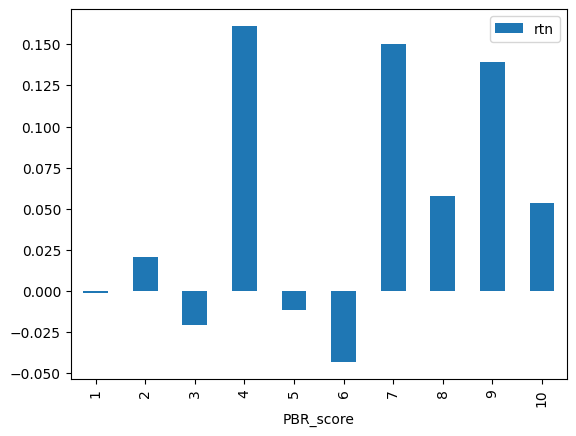

In [91]:
pbr_rtn_df.plot(kind='bar')

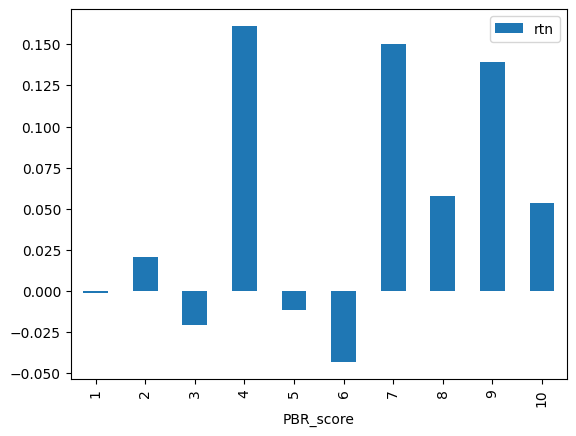

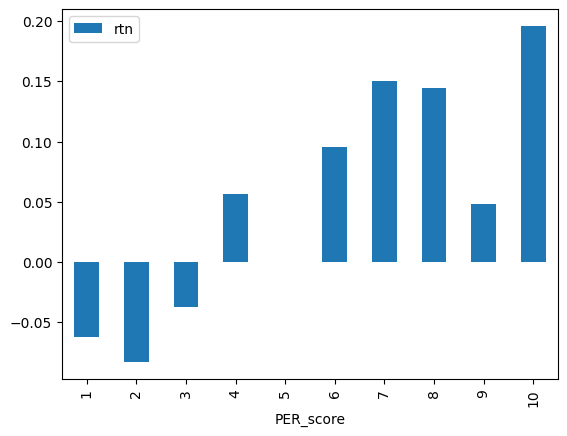

In [92]:
pbr_rtn_df.plot(kind='bar');
per_rtn_df.plot(kind='bar');

### Examples

In [93]:
g_df1 = g_df.groupby(["PBR_score", "PER_score"])\
            .agg(
                {
                    'rtn': ['mean', 'std', 'min', 'max'],
                    'ROE(%)': [np.mean, 'size', 'nunique', 'idxmax'] # idmax는 해당 컬럼값이 가장 큰 행의 인덱스
                 }
            )
g_df1.head()

rtn                     ROE(%)                       
                      mean   std    min   max    mean size nunique    idxmax
PBR_score PER_score                                                         
1         1         -0.100 0.072 -0.196 0.003  -1.402    5       5  한국수출포장공업
          2         -0.093 0.266 -0.482 0.437 154.967   11      11      삼부토건
          3          0.117 0.359 -0.556 0.683   6.952   11      11    한국전력공사
          4          0.106 0.295 -0.273 0.882   5.104   11      11      한국공항
          5         -0.039 0.120 -0.206 0.113   3.941    7       7    성창기업지주

In [94]:
a = g_df.groupby(["PBR_score", "PER_score"])['rtn', 'ROE(%)'].agg(['sum', 'mean'])

C:\Users\hs041\AppData\Local\Temp\ipykernel_17064\3376508614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = g_df.groupby(["PBR_score", "PER_score"])['rtn', 'ROE(%)'].agg(['sum', 'mean'])


In [95]:
# Multi-index라고 해서 쫄 것 없음!
a.loc[1]
a.loc[(1, 3)]
a.loc[[(1, 3), (1, 4 )]]

rtn          ROE(%)        
             sum   mean      sum    mean
PER_score                               
1         -0.499 -0.100   -7.009  -1.402
2         -1.025 -0.093 1704.634 154.967
3          1.290  0.117   76.477   6.952
4          1.165  0.106   56.146   5.104
5         -0.275 -0.039   27.590   3.941
6         -0.666 -0.333    6.710   3.355
7         -0.126 -0.031   11.435   2.859
8          0.000    NaN    0.000     NaN
9         -0.175 -0.058    3.039   1.013
10         0.226  0.032    2.873   0.410

rtn     sum     1.290
        mean    0.117
ROE(%)  sum    76.477
        mean    6.952
Name: (1, 3), dtype: float64

rtn       ROE(%)      
                      sum  mean    sum  mean
PBR_score PER_score                         
1         3         1.290 0.117 76.477 6.952
          4         1.165 0.106 56.146 5.104

### 주의: nan은 groupby시 자동으로 filter out 되기 때문에, 미리 전처리 다 하는게 좋음 

In [96]:
df = pd.DataFrame({
    'a':['소형주', np.nan, '대형주', '대형주'],
    'b':[np.nan, 2,         3,     np.nan],
})
df

,a,b
0,소형주,NaN
1,NaN,2.000
2,대형주,3.000
3,대형주,NaN


In [97]:
df.groupby(['a'])['b'].mean()
# a를 기준으로 groupby했지만 NaN은 포함되지 않음.
# 평균 계산할 때에도 NaN은 빼고 해버림. 소형주는 숫자가 정상인 것이 없어서 그냥 NaN 표시됨.

a
대형주   3.000
소형주     NaN
Name: b, dtype: float64

###  `as_index = False` : group cols들이 index가 아니라 하나의 col이 됨 (aggregate하고 reset_index()를 취한 것)

In [98]:
# reset_index(): 기존에 set_index로 특정 컬럼을 인덱스로 세팅했을 때, 이를 다시 integer index로 돌리는 함수.

a = g_df.groupby(["PER_score"]                ).agg({'rtn': ['mean', 'std']}).head(2)
b = g_df.groupby(["PER_score"], as_index=False).agg({'rtn': ['mean', 'std']}).head(2)

In [99]:
a
b

rtn      
            mean   std
PER_score             
1         -0.062 0.328
2         -0.083 0.781

PER_score    rtn      
              mean   std
0         1 -0.062 0.328
1         2 -0.083 0.781

In [100]:
a.index
a.columns
# columns가 왜 index타입? 행을 하나 가져왔을 때, 컬럼명이 인덱스가 되었던 것을 생각하라.

CategoricalIndex([1, 2], categories=[1, 2, 3, 4, ..., 7, 8, 9, 10], ordered=True, dtype='category', name='PER_score')

MultiIndex([('rtn', 'mean'),
            ('rtn',  'std')],
           )

In [101]:
b.index
b.columns

RangeIndex(start=0, stop=2, step=1)

MultiIndex([('PER_score',     ''),
            (      'rtn', 'mean'),
            (      'rtn',  'std')],
           )

In [102]:
a['rtn']

,mean,std
PER_score,,
1,-0.062,0.328
2,-0.083,0.781


In [106]:
a[('rtn', 'mean')].head()
# 컬럼의 멀티 인덱스는 위와 같이 튜플을 쓴다.
# 행이면 loc으로 가져왔다.
# 까다롭기 때문에, 아래에서 하나로 병합하는 법을 배워본다.

PER_score
1   -0.062
2   -0.083
Name: (rtn, mean), dtype: float64

### Multi-index columns을 하나로 병합하기

In [107]:
g_df1.head()

rtn                     ROE(%)                       
                      mean   std    min   max    mean size nunique    idxmax
PBR_score PER_score                                                         
1         1         -0.100 0.072 -0.196 0.003  -1.402    5       5  한국수출포장공업
          2         -0.093 0.266 -0.482 0.437 154.967   11      11      삼부토건
          3          0.117 0.359 -0.556 0.683   6.952   11      11    한국전력공사
          4          0.106 0.295 -0.273 0.882   5.104   11      11      한국공항
          5         -0.039 0.120 -0.206 0.113   3.941    7       7    성창기업지주

In [108]:
level0 = g_df1.columns.get_level_values(0)
level1 = g_df1.columns.get_level_values(1)

level0
level1

Index(['rtn', 'rtn', 'rtn', 'rtn', 'ROE(%)', 'ROE(%)', 'ROE(%)', 'ROE(%)'], dtype='object')

Index(['mean', 'std', 'min', 'max', 'mean', 'size', 'nunique', 'idxmax'], dtype='object')

In [111]:
g_df1.columns = level0 + '_' + level1 # 문자열에 대해서도 벡터 연산 가능!
# 길이가 같으므로, 바로 columns에 덮어씌우기 가능

In [112]:
g_df1.head(2)

rtn_mean  rtn_std  rtn_min  rtn_max  ROE(%)_mean  \
PBR_score PER_score                                                     
1         1            -0.100    0.072   -0.196    0.003       -1.402   
          2            -0.093    0.266   -0.482    0.437      154.967   

                     ROE(%)_size  ROE(%)_nunique ROE(%)_idxmax  
PBR_score PER_score                                             
1         1                    5               5      한국수출포장공업  
          2                   11              11          삼부토건

In [113]:
g_df1 = g_df1.reset_index()
g_df1.head()

,PBR_score,PER_score,rtn_mean,rtn_std,rtn_min,rtn_max,ROE(%)_mean,ROE(%)_size,ROE(%)_nunique,ROE(%)_idxmax
0,1,1,-0.100,0.072,-0.196,0.003,-1.402,5,5,한국수출포장공업
1,1,2,-0.093,0.266,-0.482,0.437,154.967,11,11,삼부토건
2,1,3,0.117,0.359,-0.556,0.683,6.952,11,11,한국전력공사
3,1,4,0.106,0.295,-0.273,0.882,5.104,11,11,한국공항
4,1,5,-0.039,0.120,-0.206,0.113,3.941,7,7,성창기업지주


# 실전예제: 시가총액으로 Small and Big 나누기 

In [5]:
a_df = pd.read_csv("my_data/Small_and_Big.csv", index_col=[0])
a_df.head()
# 월별 데이터로 존재하므로, 월별로 median 값을 구해 이보다 크면 big, 작으면 small로 해보자.

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000


In [115]:
a_df.tail()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
235924,2018-06-30,흥국에프엔비,0.950,1.364,-1.690,64926000000.000
235925,2018-06-30,흥국화재,0.650,0.721,8.890,383175000000.000
235926,2018-06-30,흥아해운,0.920,1.240,-5.750,134473000000.000
235927,2018-06-30,희림,1.390,0.216,2.230,86250000000.000
235928,2018-06-30,힘스,1.420,NaN,-15.820,82748000000.000


In [7]:
median_df = a_df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.head()

,시가총액 (보통)(평균)(원)
date,
2000-07-31,34947000000.000
2000-08-31,33684000000.000
2000-09-30,33684000000.000
2000-10-31,30523000000.000
2000-11-30,30798000000.000


In [8]:
median_df.columns = ['시가총액_median']
median_df.head()

,시가총액_median
date,
2000-07-31,34947000000.000
2000-08-31,33684000000.000
2000-09-30,33684000000.000
2000-10-31,30523000000.000
2000-11-30,30798000000.000


- 구한 median dataframe을 어떻게 가존의 원본 dataframe과 연결 시킬수있을까?
=> 다음 노트북!

In [11]:
a_df = a_df.join(median_df, how='left', on='date')

In [12]:
a_df.loc[a_df['시가총액 (보통)(평균)(원)'] < a_df['시가총액_median'], 'size'] = 'small'
a_df.loc[a_df['시가총액 (보통)(평균)(원)'] >= a_df['시가총액_median'], 'size'] = 'big'

In [13]:
a_df

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),시가총액_median,size
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000,34947000000.000,small
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000,34947000000.000,big
2,2000-07-31,CJ ENM,6.560,NaN,17.400,400467000000.000,34947000000.000,big
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000,34947000000.000,big
4,2000-07-31,CJ씨푸드,NaN,0.227,32.000,1987000000.000,34947000000.000,small
...,...,...,...,...,...,...,...,...
235924,2018-06-30,흥국에프엔비,0.950,1.364,-1.690,64926000000.000,164650000000.000,small
235925,2018-06-30,흥국화재,0.650,0.721,8.890,383175000000.000,164650000000.000,big
235926,2018-06-30,흥아해운,0.920,1.240,-5.750,134473000000.000,164650000000.000,small
235927,2018-06-30,희림,1.390,0.216,2.230,86250000000.000,164650000000.000,small
